# Fremstilling av Utslipp

Behandling av data:



In [1]:


import sys  
import pandas as pd
import os

if os.getcwd().split(os.path.sep)[-1] == "processed_data":
    os.chdir("..")

from src.Utslipp import analyze_clean_utslipp_data, statitics_plot, plots_part_2 , missing_values


file_path_utslipp = "raw_data/data/Utslippdata.csv"
df = pd.read_csv(file_path_utslipp)

df_clean = analyze_clean_utslipp_data(df)
plotter = statitics_plot(df_clean)



##### Visualisering av gjennomsnittlige totalutlipp per år 

Figur 1: gir en oversikt over Co2 utslipp over tid ved bruk av gjennomsnitt. Gjenomsnittet gir middelverdi representasjon av utslippene per år. I figur 1 


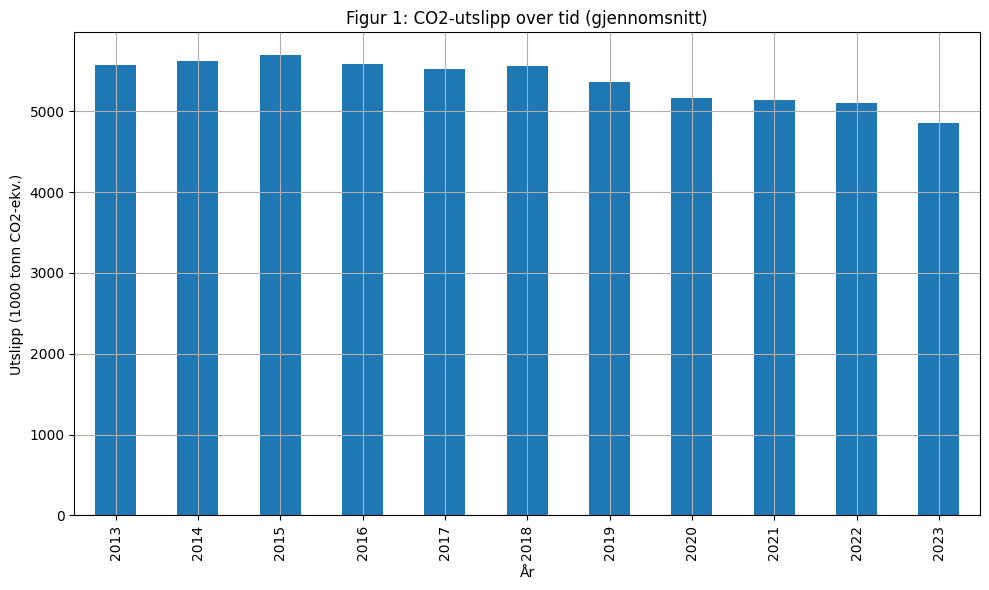

In [2]:
mean = plotter.plot_co2_per_year_mean()


##### Visualisering av CO2 utslipp over tid i median

Figur 2: Gir ett annen innblikk på utslippet i median. Ved bruk av median vil ikke ekstremverdier forsvinne og vil gi et mer representivt fremstilling av utslippet. Vi ser dermed at den største andelen av utslipp foregår i  2018 motsetning til gjenomsnittlig som foregår i 2015 vist på figur 1.

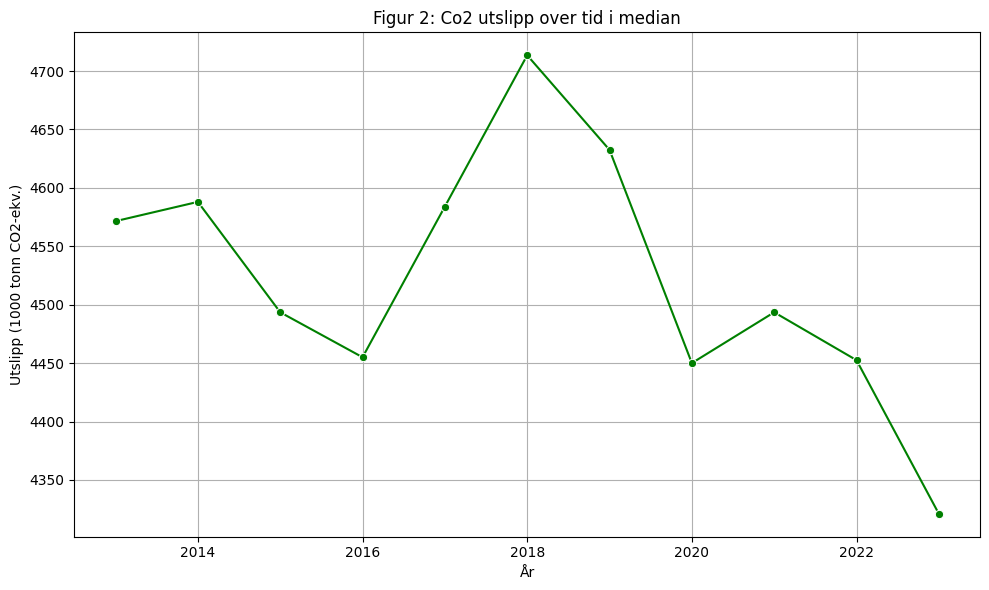

In [3]:
plotter.plot_co2_per_year_median()

##### Gjennomsnittlige CO2-utslipp per kilde 

På figur 3 fremstilliger den gjennomsnittlige Co2-utslipp per kilde. Her ser vi at Olje-og gassutvinning utgjør den gjennomsnittlige største utslippen per tid. Vi ser også at det er andre kilder som også bidrar til et stor andel av utslipp som Industri og bergverk og veitrafrikk. Jordbruk utgjør en minimal andel av Co2 utslipp. 

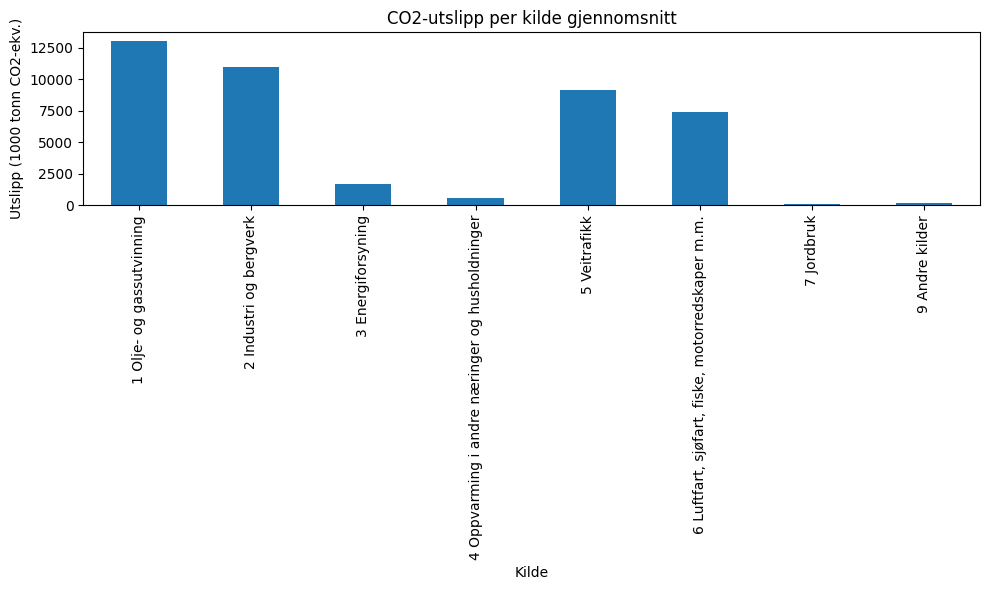

In [4]:
plotter.plot_co2_per_source_mean()

##### CO2-utslipp av per kilde i standardavvik

På figur 4 kan vi se CO2-utslipp per kilde i standardavvik. Standardavvik er et mål på datakvalitet og jevnhet. På figur 4 kan vi se at olje og gassutvinning so tyder på at olje - og gasutvinning har betrakelig reduserdt gjennom årene i motsetning til energiforsyning som har mindre varasjon gjennom årene.


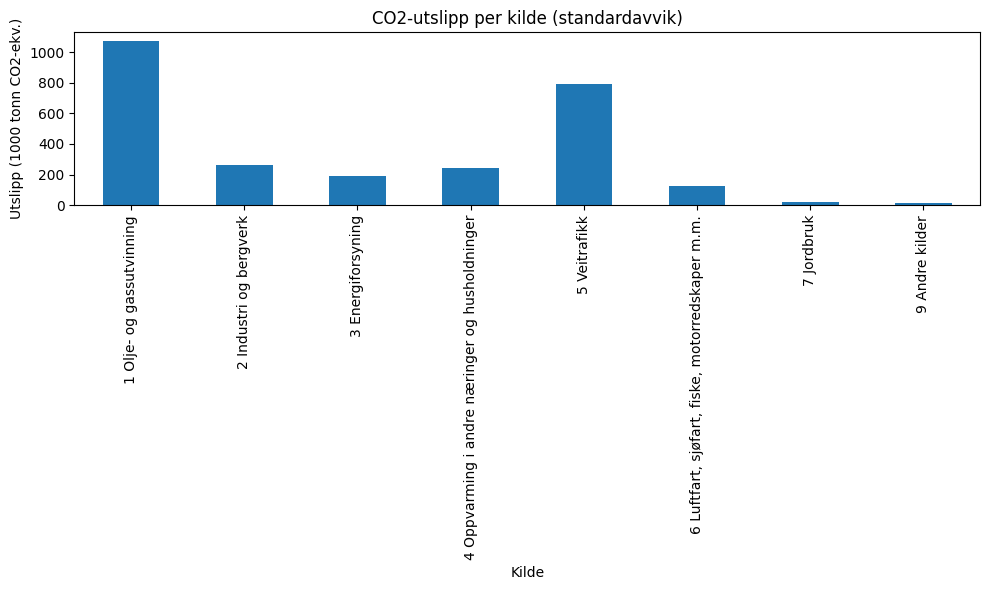

In [5]:
std = plotter.plot_co2_per_year_std()


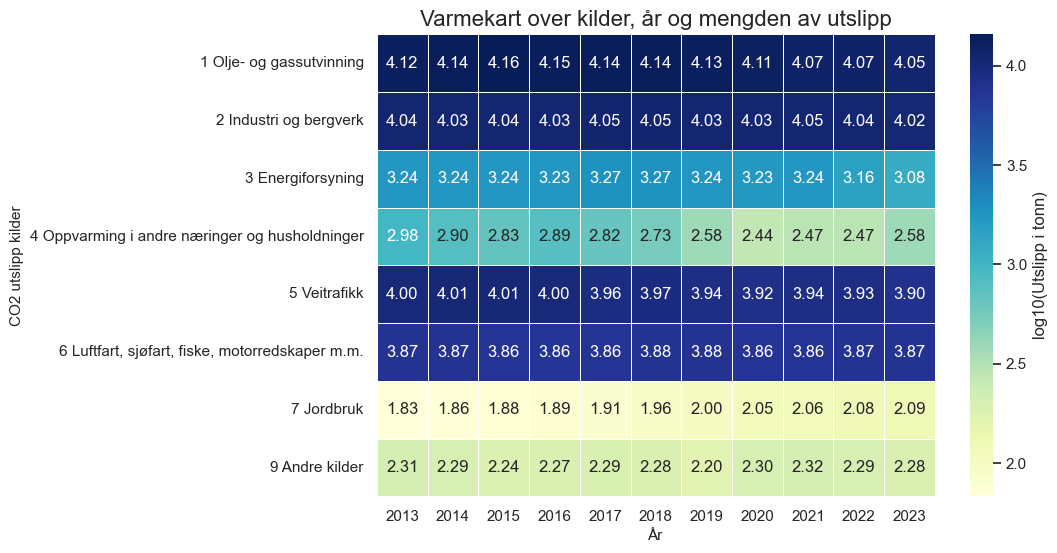

In [6]:
plotter.plot_co2_source_year_hm()


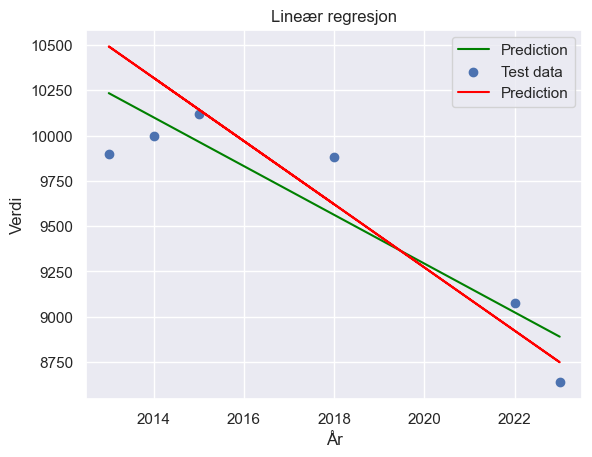

r2 =  0.6870286803599372


In [11]:
plotters = plots_part_2(df)
plotters.linreg_train_test()



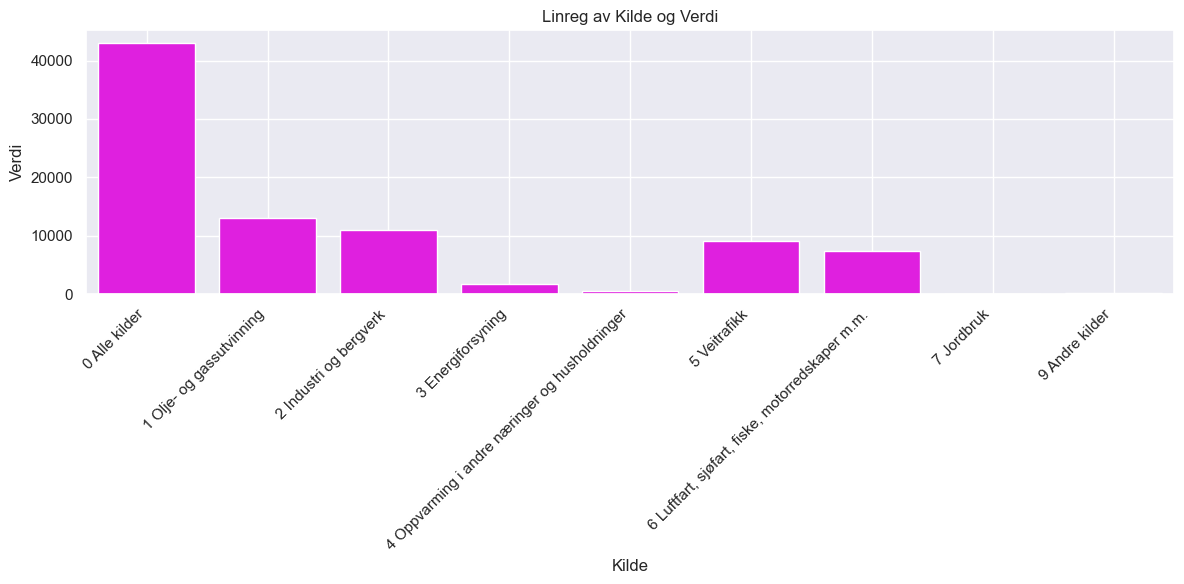

In [8]:
plotters = plots_part_2(df)
plotters.barplot()


c:\Nilavan\OneDrive\NTNU\Emner\Anvendt programmering\Mappe del 1,2\Miljo 21.05\milj-dataanalyse\src\Utslipp.py:285: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incomplete_cases = self.df[df.isnull().any(axis=1)]


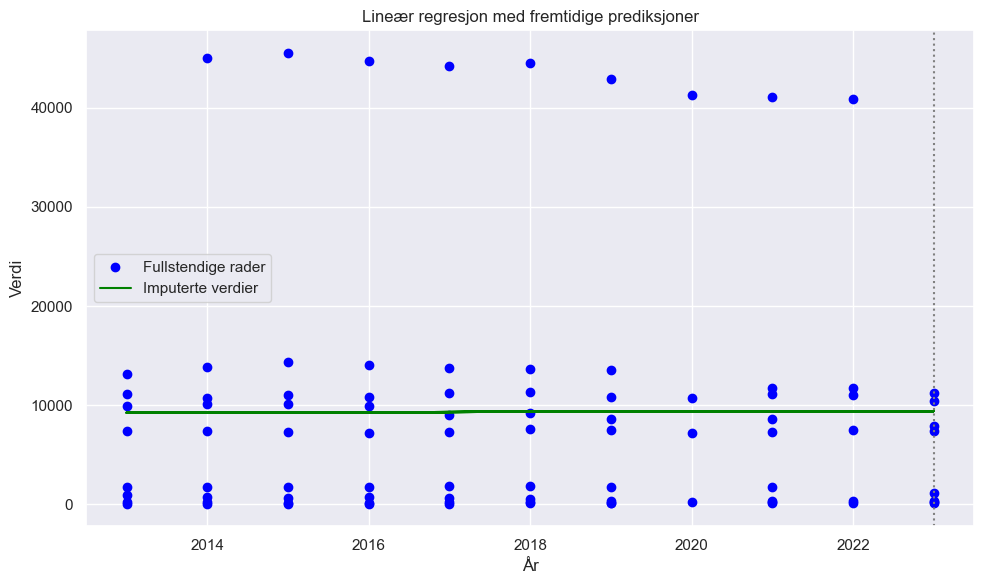

In [9]:
mv = missing_values(df)

# 3. Fjern tilfeldig 10 % av dataene
mv.remove_random_data(andel=0.1, seed=42)

# 4. Plott
mv.plot_missing_data()


In [ ]:
plotters = plots_part_2(df)
plotters.futureplot()


interactive(children=(IntSlider(value=2024, continuous_update=False, description='Velg år:', max=2033, min=202…